Anyone with a bank account currently living must have encountered the words 'Transaction Fraud'. It might be their personal experience or a third-party experience heard from someone else or from agents selling insurance. As the world is becoming more and more digital, the transaction frauds are also increasing at a rapid pace. In a study, it is found out that 24 bilion USD is lost due to credit card fraud transactions in one year.Banking and financial institutions are facing severe challenges due to fraudulent transactions.

To tackle these frauds, there is a need for banks to put strategies in place so that customers' money is not lost. The most common strategy used by banks is put a threshold on transaction amount and any transaction above that amount requires multiple-authentications from customer. This method works well in most of the cases but it is a crude way to make a fraud strategy as it spoils the customer experience. Also having a dumb strategy like this would not work because of the fraudsters' scary ability of adapting to different environments. An evolving and intelligent fraud policy is the best solution to this problem. Machine learning is the perfect answer and algorithms like Boosting and Regression can be used to classify frauds.

Post building a model, we can use this to predict whether a fraud can happen or not and only authenticate a transaction if the model says so. There is another problem that many banks encounter while model implementation that is to run the model on real-time basis and give results instantly. Unlike models to optimize marketing campaigns or determine customer's risk score which can be done in batch, transaction models need to be run on real-time. Hence there is lot of emphasis on big data cloud platforms like AWS, Azure and Hadoop that stores data and implement machine learning models on scale when considering transaction frauds.

 This case study aims to answer some of the questions related to transaction frauds using visualizations. Couple of classification models would also be built at the end and the features that drive these models' performance would be explained.

# **Dataset Description**

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.



# **Loading Library & Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Fraud.csv')

# Basic Understanding about the data

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# **Missing Values**

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

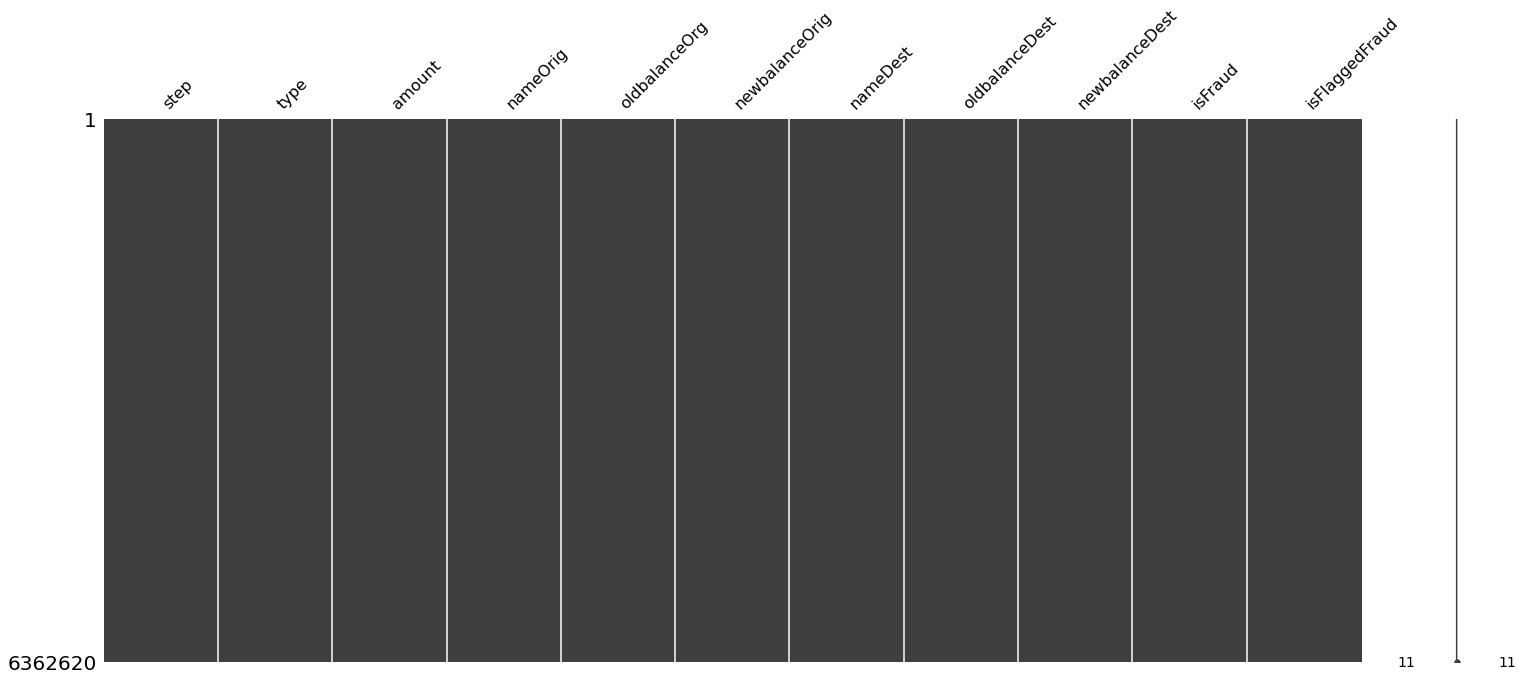

In [7]:
msno.matrix(df);

Here we are not seeing any missing values

# Exploratory Data Analysys

In [8]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

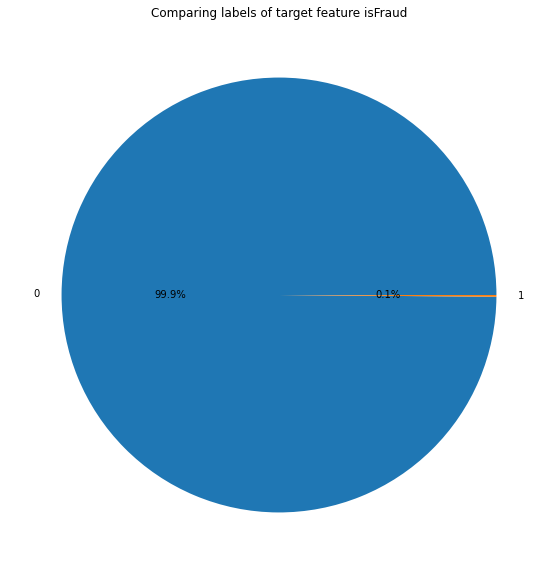

In [10]:
values = df['isFraud'].value_counts().values.tolist()
labels = df['isFraud'].value_counts().index
plt.figure(figsize= (10,10))
plt.title('Comparing labels of target feature isFraud')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()

Here we are seeing that datasert is completly imbaslanced, that's why we cann't  rely on accuaracy 

In [11]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

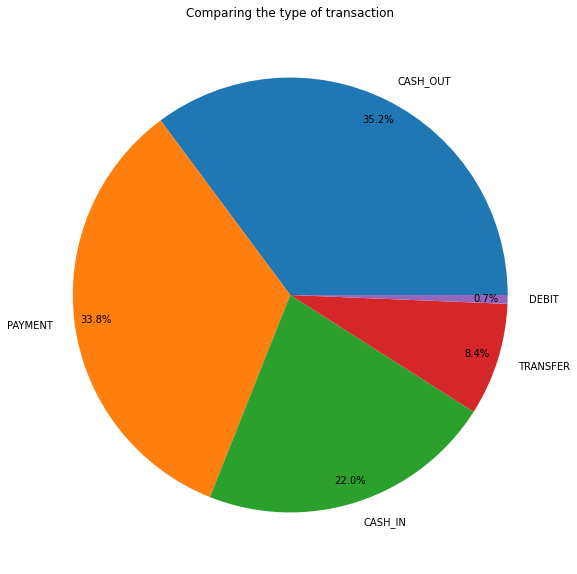

In [12]:
values = df['type'].value_counts().values.tolist()
labels = df['type'].value_counts().index
plt.figure(figsize= (10,10))
plt.title('Comparing the type of transaction')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .9)
plt.show()

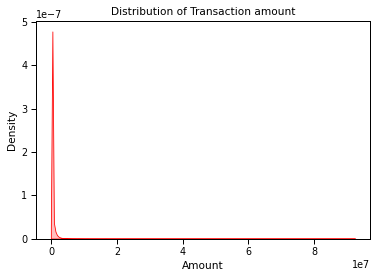

In [13]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.amount,
                color="Red", shade = True);
ax.set_ylabel('Density');
ax.set_xlabel('Amount');
ax.set_title('Distribution of Transaction amount');


To analysis the nameorig and namedest features we don't need the id number So let's create two new columns only taking the first letter of those columns.

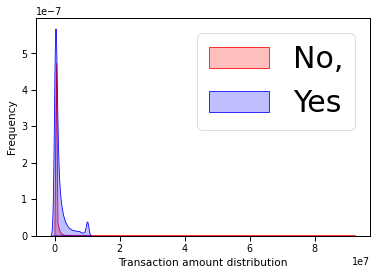

In [14]:
g = sns.kdeplot(df['amount'][(df["isFraud"] == 0)] , color="Red", shade = True)
g = sns.kdeplot(df['amount'][(df["isFraud"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('Transaction amount distribution')
g.set_ylabel("Frequency")
g = g.legend(["No,","Yes"],fontsize = 30)

In [15]:
df['nameOrig'] = df['nameOrig'].str[:1]
df['nameDest'] = df['nameDest'].str[:1]

In [16]:
df['nameOrig'].value_counts()

C    6362620
Name: nameOrig, dtype: int64

In [17]:
df['nameDest'].value_counts()

C    4211125
M    2151495
Name: nameDest, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


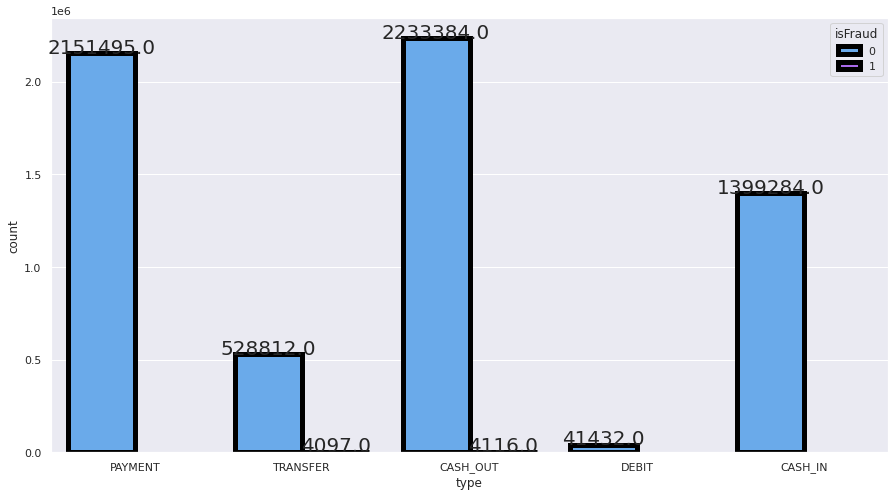

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(data=df,
                  x = 'type',
                  hue = 'isFraud',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="cool"
                  )
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)


All fraud transfers are under the type 'TRANSFER' and 'CASH-OUT'

In [19]:
print('Type of payments which are fraudulent are:',list(df.loc[(df.isFraud==1)].type.unique()))
print('No. of fraudulent transfers which are "Transfer" type are :', len(df.loc[(df.isFraud==1)&(df.type=='TRANSFER')]))
print('No. of fraudulent transfers which are "CASH_OUT" type are :', len(df.loc[(df.isFraud==1)&(df.type=='CASH_OUT')]))

Type of payments which are fraudulent are: ['TRANSFER', 'CASH_OUT']
No. of fraudulent transfers which are "Transfer" type are : 4097
No. of fraudulent transfers which are "CASH_OUT" type are : 4116


In [20]:
df.loc[df['type']=='TRANSFER'].nameDest.str.contains('M').any()

False

In [21]:
df.loc[df['type']=='CASH_OUT'].nameDest.str.contains('M').any()

False

In [22]:
x = (len(df.loc[(df['type']=='TRANSFER') & (df['nameDest']=='C') & (df.isFraud==1)]))
y = (len(df.loc[(df['type']=='TRANSFER') & (df['nameDest']=='C') & (df.isFraud==0)]))
print(x,y)

print('Probality of a fraud transaction if type is TRansfer and nameorig is C',((x/y)))


4097 528812
Probality of a fraud transaction if type is TRansfer and nameorig is C 0.007747554896636233


In [23]:
x = (len(df.loc[(df['type']=='CASH_OUT') & (df['nameDest']=='C') & (df.isFraud==1)]))
y = (len(df.loc[(df['type']=='CASH_OUT') & (df['nameDest']=='C') & (df.isFraud==0)]))
print(x,y)

print('Probality of a fraud transaction if type is TRansfer and nameorig is C',((x/y)))


4116 2233384
Probality of a fraud transaction if type is TRansfer and nameorig is C 0.0018429432645707142


nameOrig and nameDest can dropped as they dont impact fraud. Also there are no suspicious transfers to merchants. Therefore they can be dropped.

In [24]:
len(df.loc[(df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0)])

2088969

In [25]:
print(len(df.loc[(df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0) & (df.isFraud==1)]))
print(len(df.loc[(df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0) & (df.isFraud==0)]))

25
2088944


In [26]:
len(df.loc[(df['oldbalanceDest']==0) & (df['newbalanceDest']==0) & (df['amount']!=0)])

2317276

In [27]:
print(len(df.loc[(df['oldbalanceDest']==0) & (df['newbalanceDest']==0) & (df['amount']!=0) & (df.isFraud==1)]))
print(len(df.loc[(df['oldbalanceDest']==0) & (df['newbalanceDest']==0) & (df['amount']!=0) & (df.isFraud==0)]))

4070
2313206


Almost half of the transactions with 0 old and new balance of desinations are fraudulent.Therefore it is a strong indicator of fraud( Also there are no merchants in fraudulent transactions whose balance details are unknown, so this feature is strong indicator of fraud).

In [28]:
print("Any transaction with amount less than or equal to 0?")
print(len(df[df.amount<=0]))
print("What type of transactions are they?")
print(df[df.amount<=0]['type'].value_counts().index[0])
print("Are all these marked as Fraud Transactions?")
df[df.amount<=0]['isFraud'].value_counts()[1] == len(df[df.amount<=0])

Any transaction with amount less than or equal to 0?
16
What type of transactions are they?
CASH_OUT
Are all these marked as Fraud Transactions?


True

# Feature Creation

AS step is a date time features we can create features like hour of the day, hour of the week, day, day of weak, day of month, day of year.

In [29]:
df1 = df.copy()

In [30]:
df1["hourday"] = df1.step % 24
df1["hourweek"] = df1.step % (24*7)
df1["day"] = round(df1.step/24)
df1["dayweek"] = df1.day % 7
df1["daymonth"] = df1.day % 30




As seen earlier, 0 values of oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest when amount is not 0 have a good chance of fraudulent transaction, we will create new freatures combining (oldbalanceOrg,newbalanceOrig,amount) and (oldbalanceDest,newbalanceDest,amount) 

In [31]:
df1['errorOrig'] = df1['amount'] + df1['newbalanceOrig'] - df1['oldbalanceOrg']
df1['errorDest'] = df1['amount'] + df1['oldbalanceDest'] - df1['newbalanceDest']

All the fraud trnasactions belong to Transfer or Cash-out type, so discard data corresponding to other types


In [32]:
df1 = df1.loc[(df1['type'].isin(['TRANSFER', 'CASH_OUT']))]
df1.head(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourday,hourweek,day,dayweek,daymonth,errorOrig,errorDest
2,1,TRANSFER,181.00,C,181.00,0.00,C,0.00,0.00,1,0,1,1,0.0,0.0,0.0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,C,181.00,0.00,C,21182.00,0.00,1,0,1,1,0.0,0.0,0.0,0.000000e+00,21363.00
15,1,CASH_OUT,229133.94,C,15325.00,0.00,C,5083.00,51513.44,0,0,1,1,0.0,0.0,0.0,2.138089e+05,182703.50
19,1,TRANSFER,215310.30,C,705.00,0.00,C,22425.00,0.00,0,0,1,1,0.0,0.0,0.0,2.146053e+05,237735.30
24,1,TRANSFER,311685.89,C,10835.00,0.00,C,6267.00,2719172.89,0,0,1,1,0.0,0.0,0.0,3.008509e+05,-2401220.00
42,1,CASH_OUT,110414.71,C,26845.41,0.00,C,288800.00,2415.16,0,0,1,1,0.0,0.0,0.0,8.356930e+04,396799.55
47,1,CASH_OUT,56953.90,C,1942.02,0.00,C,70253.00,64106.18,0,0,1,1,0.0,0.0,0.0,5.501188e+04,63100.72
48,1,CASH_OUT,5346.89,C,0.00,0.00,C,652637.00,6453430.91,0,0,1,1,0.0,0.0,0.0,5.346890e+03,-5795447.02
51,1,CASH_OUT,23261.30,C,20411.53,0.00,C,25742.00,0.00,0,0,1,1,0.0,0.0,0.0,2.849770e+03,49003.30
58,1,TRANSFER,62610.80,C,79114.00,16503.20,C,517.00,8383.29,0,0,1,1,0.0,0.0,0.0,0.000000e+00,54744.51


In [33]:
df1.shape

(2770409, 18)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df1['type'] = LabelEncoder().fit_transform(df1['type'])

In [36]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourday,hourweek,day,dayweek,daymonth,errorOrig,errorDest
2,1,1,181.00,C,181.0,0.0,C,0.0,0.00,1,0,1,1,0.0,0.0,0.0,0.00,181.0
3,1,0,181.00,C,181.0,0.0,C,21182.0,0.00,1,0,1,1,0.0,0.0,0.0,0.00,21363.0
15,1,0,229133.94,C,15325.0,0.0,C,5083.0,51513.44,0,0,1,1,0.0,0.0,0.0,213808.94,182703.5
19,1,1,215310.30,C,705.0,0.0,C,22425.0,0.00,0,0,1,1,0.0,0.0,0.0,214605.30,237735.3
24,1,1,311685.89,C,10835.0,0.0,C,6267.0,2719172.89,0,0,1,1,0.0,0.0,0.0,300850.89,-2401220.0


In [37]:
X = df1.drop(['step','nameOrig','nameDest','isFlaggedFraud', 'isFraud'],axis=1)
y = df1['isFraud']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Modeling

In [39]:
model = list()
Accuracy = list()
precision = list()
recall = list()
F1score = list()
Roc_auc = list()

In [40]:
def test_eval(clf_model, X_test, y_test, algo=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)
    #y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred))
    #sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt = .2)

    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('Accuracy Score')
    print('='*60)
    print(accuracy_score(y_test, y_pred))

    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    

    model.append(algo)
    Accuracy.append(round(accuracy_score(y_test, y_pred),2))
    precision.append(round(precision_score(y_test,y_pred),2))
    recall.append(round(recall_score(y_test,y_pred),2))
    F1score.append(round(f1_score(y_test,y_pred),2))
    Roc_auc.append(round(roc_auc_score(y_test, y_prob[:,1]),2))

   
    

# ** LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

params={'C':np.logspace( -10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = RandomizedSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression')

# ** Decision Tree**

In [ ]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]
#Impurity
criterion = ['gini', 'entropy']
#The number of features to consider when looking for the best split
max_features = ['log2', 'sqrt', 'auto']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_param_grid = { 
    'max_features':max_features,
    'criterion':criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree')

# ** Random forest CLassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()

'''rf_params={'n_estimators':estimators,
           'max_features':max_features,
           'criterion':criterion,
           'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)'''
clf_RF.fit(X_train, y_train)
#clf_RF.best_estimator_

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest')

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada=AdaBoostClassifier()
clf_ada.fit(X_train, y_train)
test_eval(clf_ada, X_test, y_test, 'AdaBoost')

# ** GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()

'''gb_params = { 
    "n_estimators":[1,3,5,10,15,20,30,40,50,],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_gb=RandomizedSearchCV(gb_model,gb_params,cv=cv, scoring='roc_auc',n_jobs=1)'''

clf_gb.fit(X_train, y_train)
#clf_gb.best_estimator_



In [ ]:
test_eval(clf_gb, X_test, y_test, 'GradientBoost')

# ** KNeighbours Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNC = KNeighborsClassifier()
clf_KNC.fit(X_train, y_train)
test_eval(clf_KNC, X_test, y_test, 'KNeighbours')

# XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum()) # giving class weight
clf_xgb = XGBClassifier( scale_pos_weight = weights, n_jobs = 4, random_state=42)
clf_xgb.fit(X_train, y_train)

